******Import Some Common Used libraries******

In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

****Load Data****

In [380]:
data=pd.read_csv("LoanData.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [381]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [382]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [383]:
data.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


****Fill NULL Values****

In [384]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [385]:
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"]=data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"]=data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])


In [386]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [387]:
data["LoanAmount"]=data["LoanAmount"].fillna(data["LoanAmount"].median())
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median())
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].median())

In [388]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

****Outlier Detections & Handling****

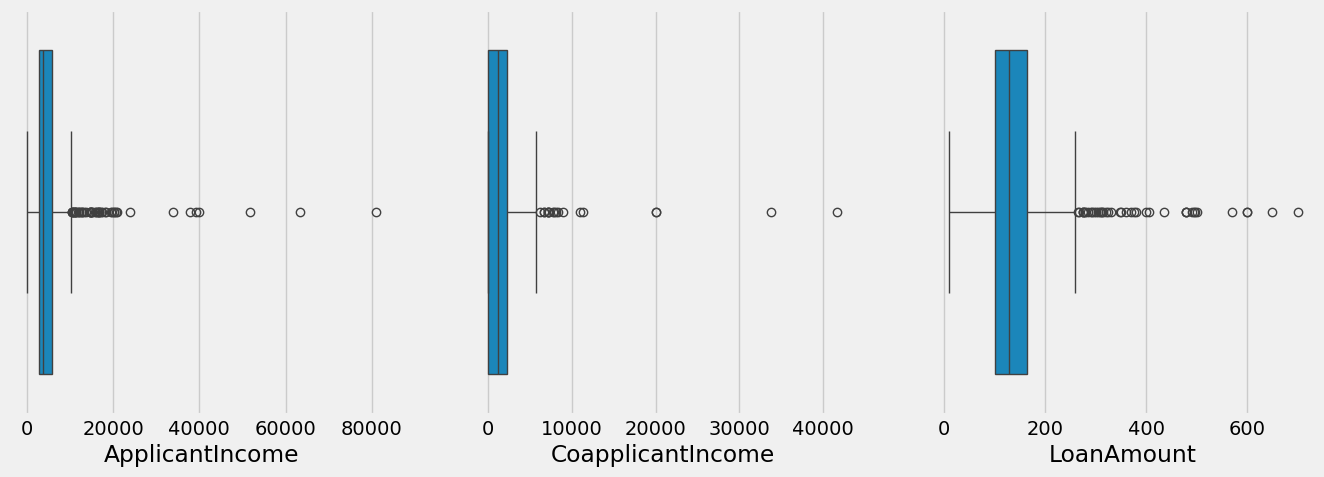

In [389]:
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize']=(15,5)

plt.subplot(1,3,1)
sns.boxplot(data["ApplicantIncome"],orient='h')

plt.subplot(1,3,2)
sns.boxplot(data["CoapplicantIncome"],orient='h')

plt.subplot(1,3,3)
sns.boxplot(data["LoanAmount"],orient='h')

plt.show()

In [390]:
print("shape befor the outlier removing : ",data.shape)
data=data[data["ApplicantIncome"]<25000]
print("shape after the outlier removing : ",data.shape)


shape befor the outlier removing :  (614, 13)
shape after the outlier removing :  (607, 13)


In [391]:
print("shape befor the outlier removing : ",data.shape)
data=data[data["CoapplicantIncome"]<12000]
print("shape after the outlier removing : ",data.shape)

shape befor the outlier removing :  (607, 13)
shape after the outlier removing :  (603, 13)


In [392]:
print("shape befor the outlier removing : ",data.shape)
data=data[data["LoanAmount"]<400]
print("shape after the outlier removing : ",data.shape)


shape befor the outlier removing :  (603, 13)
shape after the outlier removing :  (591, 13)


****Analysis****

C:\Users\hp\AppData\Local\Temp\ipykernel_11380\324397807.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["ApplicantIncome"],color='g')
C:\Users\hp\AppData\Local\Temp\ipykernel_11380\324397807.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"],color='g')
C:\Use

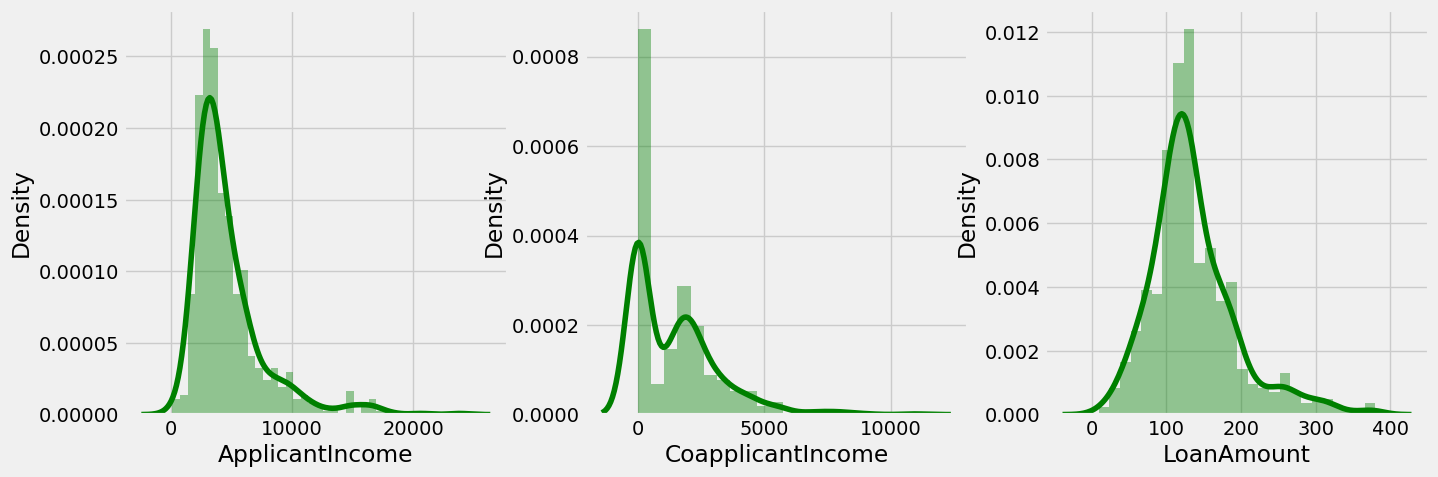

In [393]:
plt.subplot(1,3,1)
sns.distplot(data["ApplicantIncome"],color='g')

plt.subplot(1,3,2)
sns.distplot(data["CoapplicantIncome"],color='g')

plt.subplot(1,3,3)
sns.distplot(data["LoanAmount"],color='g')

plt.show()

****Logarithmic Transformation****

C:\Users\hp\AppData\Local\Temp\ipykernel_11380\1513861011.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["ApplicantIncome"],color='green')
C:\Users\hp\AppData\Local\Temp\ipykernel_11380\1513861011.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"],color='gree

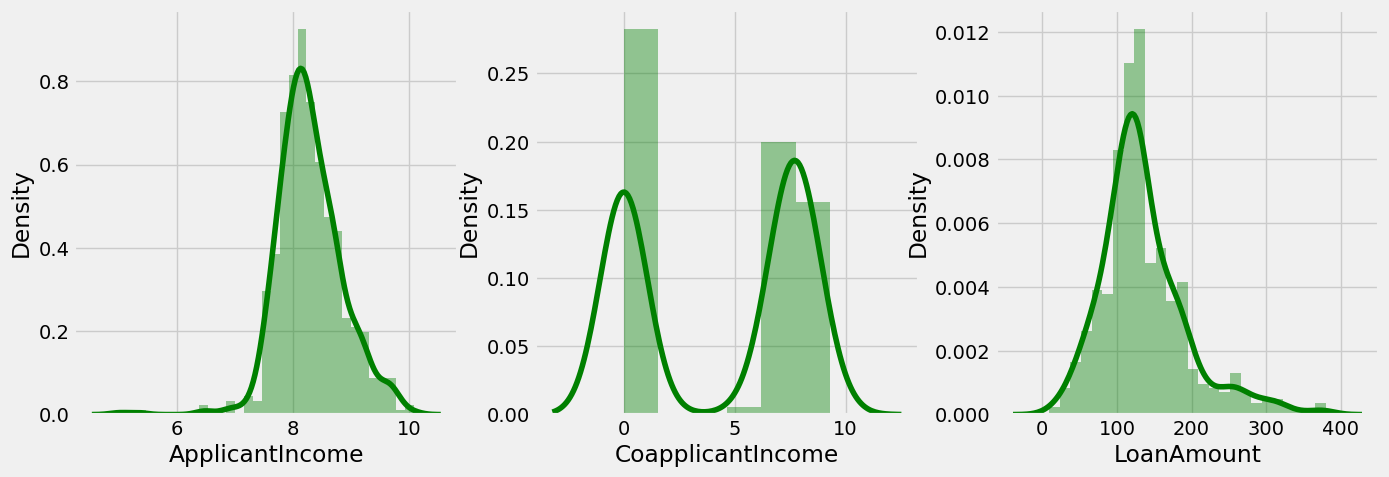

In [394]:
data["ApplicantIncome"]=np.log(data["ApplicantIncome"])
data["CoapplicantIncome"]=np.log1p(data["CoapplicantIncome"])


plt.subplot(1,3,1)
sns.distplot(data["ApplicantIncome"],color='green')
plt.subplot(1,3,2)
sns.distplot(data["CoapplicantIncome"],color='green')
plt.subplot(1,3,3)
sns.distplot(data["LoanAmount"],color='green')

plt.show()

In [395]:
num=data.select_dtypes('number').columns.tolist()
cat=data.select_dtypes("object").columns.tolist()


In [396]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [397]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [398]:

print(pd.crosstab(data['Loan_Status'],data['Gender']))

Gender       Female  Male
Loan_Status              
N                36   147
Y                73   335


In [399]:
print(pd.crosstab(data['Loan_Status'],data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [400]:
print(pd.crosstab(data['Loan_Status'],data['Dependents']))

Dependents     0   1   2  3+
Loan_Status                 
N            110  34  24  15
Y            240  63  74  31


In [401]:
print(pd.crosstab(data['Loan_Status'],data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [402]:
print(pd.crosstab(data['Loan_Status'],data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


In [403]:
print(pd.crosstab(data['Loan_Status'],data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [404]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [405]:
data=data.drop(['Loan_ID'],axis=1)

In [406]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


****“Categorical Data Encoding”****

In [407]:

#       1=male,  0=female
data['Gender']=data['Gender'].replace(("Male","Female"),(1,0))

#    1=married,    0=single
data['Married']=data['Married'].replace(('Yes','No'),(1,0))

#      1=Graduate,    0=Not Graduate
data['Education']=data["Education"].replace(('Graduate','Not Graduate'),(1,0))

#         1=self employeed,   0 = non self employeed
data['Self_Employed']=data['Self_Employed'].replace(('Yes','No'),(1,0))

#           1=urban,     1=semiurban ,     0=rural
data['Property_Area']=data['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0))

#          1=loan accepted,    0=loan rejected       
data['Loan_Status']=data['Loan_Status'].replace(('Y','N'),(1,0))


#     0=0,   1=1,    2=1,    3+=1
data['Dependents']=data['Dependents'].replace(('0','1','2','3+'),(0,1,1,1))

C:\Users\hp\AppData\Local\Temp\ipykernel_11380\2403537944.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender']=data['Gender'].replace(("Male","Female"),(1,0))
C:\Users\hp\AppData\Local\Temp\ipykernel_11380\2403537944.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Married']=data['Married'].replace(('Yes','No'),(1,0))
C:\Users\hp\AppData\Local\Temp\ipykernel_11380\2403537944.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavio

In [408]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


****Feature-Target Split****

In [409]:
x=data.drop(['Loan_Status'],axis=1)
y=data['Loan_Status']

In [410]:
x.shape

(591, 11)

In [411]:
y.shape

(591,)

In [412]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [413]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int64

****SMOTE (Synthetic Minority Oversampling Technique)****

In [414]:
from imblearn.over_sampling import SMOTE
x_rasample,y_rasample=SMOTE().fit_resample(x,y.values.ravel())

In [415]:
print(x_rasample.shape)
print(y_rasample.shape)

(816, 11)
(816,)


In [416]:
y.shape

(591,)

****train and test the model****

In [417]:
from sklearn.model_selection import train_test_split

In [418]:
x_train,x_test,y_train,y_test=train_test_split(x_rasample,y_rasample,test_size=0.2,random_state=0)

****create a model for prediction****

In [419]:
from sklearn.linear_model import LogisticRegression

In [420]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [421]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [422]:
y_pred=model.predict(x_test)
y_pred=np.round(y_pred)

In [423]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        82
           1       0.76      0.89      0.82        82

    accuracy                           0.80       164
   macro avg       0.81      0.80      0.80       164
weighted avg       0.81      0.80      0.80       164



In [424]:
print("traning Accuracy : ",model.score(x_train,y_train))
print("testing accuracy : ",model.score(x_test,y_test))

traning Accuracy :  0.7883435582822086
testing accuracy :  0.8048780487804879


In [425]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

****follow ⇩ series to fill your Data for  predict the your loan status****

In [426]:
model_pred=np.array([[1,1,1,1,1,3924,1733,148.0,360,1,1]])


In [427]:
predictions = model.predict(model_pred)
print(predictions[0])

0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [428]:
import pickle